# Watcha Pedia 박스 오피스 영화 정보 수집하기

## 필요한 라이브러리 설치

In [1]:
!pip install lxml
!pip install requests
!pip install bs4
!pip install openpyxl
!pip install selenium

## 목표 URL 수집하기

In [4]:
import requests # HTTP request부분을 쉽게 구현해주는 라이브러리
watcha_url = 'https://pedia.watcha.com/ko-KR/?domain=movie' #크롤링 원하는 주소
response = requests.get(watcha_url)
response # 내가 원하는 것? https://docs.python-requests.org/en/latest/api/#requests.Response
# 200 : 잘 되었다는 뜻

<Response [200]>

In [ ]:
# 다른 번호의 뜻이 궁금하다면!
# 아래 링크 따라가보기!

# https://hi098123.tistory.com/200

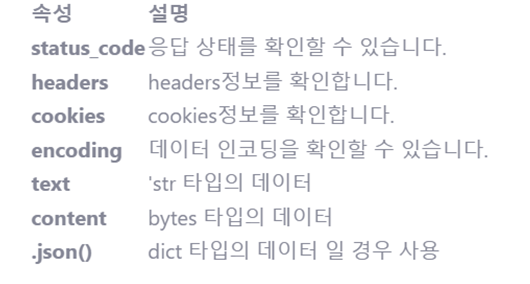

'\n  <!doctype html>\n    <html lang="ko-KR">\n    <head>\n      \n    \n    <!-- Google Tag Manager -->\n    <script>\n      window.dataLayer = window.dataLayer || [];\n      (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n      new Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n      j=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n      \'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n      })(window,document,\'script\',\'dataLayer\',\'GTM-KVV8C33\');\n    </script>\n  \n    \n    <!-- Global Site Tag (gtag.js) - Google Analytics -->\n    <script async src="https://www.googletagmanager.com/gtag/js?id=UA-27006241-7"></script>\n    <script>\n      window.dataLayer = window.dataLayer || [];\n      function gtag(){dataLayer.push(arguments);}\n      gtag(\'js\', new Date());\n    \n      gtag(\'config\', \'UA-27006241-7\');\n      gtag(\'config\', \'G-1PYHGTCRYW\');\n      // 일본 광고용\n
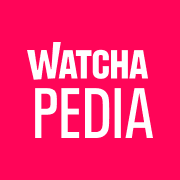
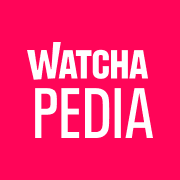
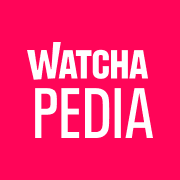
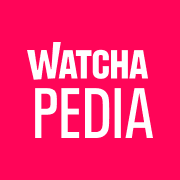
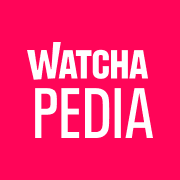
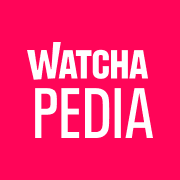
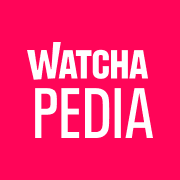
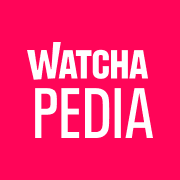

In [4]:
response.text #유니코드


In [5]:
response.encoding

'utf-8'

b'\n  <!doctype html>\n    <html lang="ko-KR">\n    <head>\n      \n    \n    <!-- Google Tag Manager -->\n    <script>\n      window.dataLayer = window.dataLayer || [];\n      (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n      new Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n      j=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n      \'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n      })(window,document,\'script\',\'dataLayer\',\'GTM-KVV8C33\');\n    </script>\n  \n    \n    <!-- Global Site Tag (gtag.js) - Google Analytics -->\n    <script async src="https://www.googletagmanager.com/gtag/js?id=UA-27006241-7"></script>\n    <script>\n      window.dataLayer = window.dataLayer || [];\n      function gtag(){dataLayer.push(arguments);}\n      gtag(\'js\', new Date());\n    \n      gtag(\'config\', \'UA-27006241-7\');\n      gtag(\'config\', \'G-1PYHGTCRYW\');\n      // \xec\x9
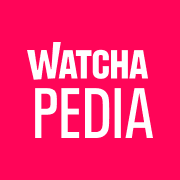
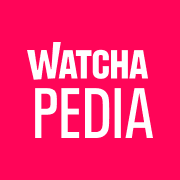
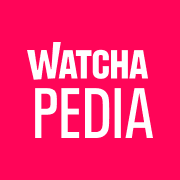
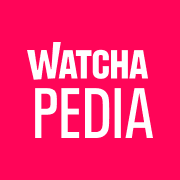
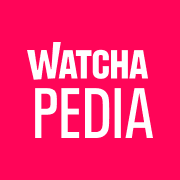
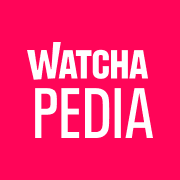
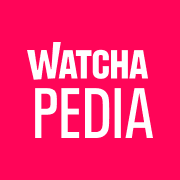
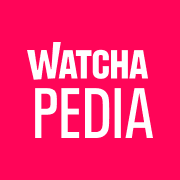

In [5]:
response.content 

In [10]:
from lxml import html 
# XML 또는 HTML을 Parcing 해주는 라이브러리
# Parsing이란 가져온다는 뜻

# 아래 라인이 아주 핵심적인것!!
# 우리가 원하는 박스오피스순위 10까지 URL을 가져오는 것

bo_urls = ['http://pedia.watcha.com' + i for i in html.fromstring(response.text).xpath('//*[@id="root"]/div/div[1]/section/div/section/div[1]/div[2]/div/div[1]/div/div/ul//li//a/@href')]
bo_urls

['http://pedia.watcha.com/ko-KR/contents/mdj20mq',
 'http://pedia.watcha.com/ko-KR/contents/mO1jmAV',
 'http://pedia.watcha.com/ko-KR/contents/mOgjGVz',
 'http://pedia.watcha.com/ko-KR/contents/m5Go91n',
 'http://pedia.watcha.com/ko-KR/contents/m5Zl46z',
 'http://pedia.watcha.com/ko-KR/contents/md6aNEZ',
 'http://pedia.watcha.com/ko-KR/contents/mO071Ka',
 'http://pedia.watcha.com/ko-KR/contents/mJO1awO',
 'http://pedia.watcha.com/ko-KR/contents/mW42AGq',
 'http://pedia.watcha.com/ko-KR/contents/mdjqoqO']

In [ ]:
//*[@id="root"]/div/div[1]/section/div/section/div[1]/div[2]/div/div[1]/div/div/ul/li[1]/a/div[2]/div[1]

In [ ]:
//*[@id="root"]/div/div[1]/section/div/section/div[1]/div[2]/div/div[1]/div/div/ul/li[2]/a/div[2]/div[1]

In [ ]:
//*[@id="root"]/div/div[1]/section/div/section/div[1]/div[2]/div/div[1]/div/div/ul/li[3]/a/div[2]/div[1]

In [ ]:
//*[@id="root"]/div/div[1]/section/div/section/div[1]/div[2]/div/div[1]/div/div/ul//li//a/@href

In [9]:
html.fromstring(response.text).xpath('//*[@id="root"]/div/div[1]/section/div/section/div[1]/div[2]/div/div[1]/div/div/ul//li//a/@href')

['/ko-KR/contents/mdj20mq',
 '/ko-KR/contents/mO1jmAV',
 '/ko-KR/contents/mOgjGVz',
 '/ko-KR/contents/m5Go91n',
 '/ko-KR/contents/m5Zl46z',
 '/ko-KR/contents/md6aNEZ',
 '/ko-KR/contents/mO071Ka',
 '/ko-KR/contents/mJO1awO',
 '/ko-KR/contents/mW42AGq',
 '/ko-KR/contents/mdjqoqO']

### [Xpath 더 알아보기](https://www.w3schools.com/xml/xpath_syntax.asp)

In [ ]:
//*[@id="root"]/div/div[1]/section/div/div[2]/div/section/div[2]/div/div/div/div/h1

## 각 URL에서 원하는 정보 획득하기

In [15]:
bo_list = []
for bo_url in bo_urls:
    movie_page = requests.get(bo_url)
    movie_title = [i.text for i in html.fromstring(movie_page.text).xpath('//*[@id="root"]/div/div[1]/section/div/div[2]/div/section/div[2]/div/div/div/div/h1')][0]
    movie_detail = [i for i in html.fromstring(movie_page.text).xpath('//*[@id="root"]/div/div[1]/section/div/div[2]/div/section/div[2]/div/div/div/div/div[1]/text()')][0]
    movie_desc  = [i for i in html.fromstring(movie_page.text).xpath('//*[@id="root"]/div/div[1]/section/div/div[2]/div/div/div/div[1]/div[1]/div/div/section[2]/div[2]/div/article/div[2]/div/text()')][0]
    movie_rate  = [i for i in html.fromstring(movie_page.text).xpath('//*[@id="root"]/div/div[1]/section/div/div[2]/div/section/div[2]/div/div/div/div/div[2]/text()')][0]
    movie_poster = [i.get('src') for i in html.fromstring(movie_page.text).xpath('//*[@id="root"]/div/div[1]/section/div/div[2]/div/section/div[1]/div[2]/div/div/div/div[1]/img')][0]
    movie_dict = {"movie_title":movie_title, "movie_detail":movie_detail,
                  "movie_desc":movie_desc, "movie_rate":movie_rate, "movie_poster":movie_poster}
    bo_list.append(movie_dict)


In [16]:
html

['http://pedia.watcha.com/ko-KR/contents/mdj20mq',
 'http://pedia.watcha.com/ko-KR/contents/mO1jmAV',
 'http://pedia.watcha.com/ko-KR/contents/mOgjGVz',
 'http://pedia.watcha.com/ko-KR/contents/m5Go91n',
 'http://pedia.watcha.com/ko-KR/contents/m5Zl46z',
 'http://pedia.watcha.com/ko-KR/contents/md6aNEZ',
 'http://pedia.watcha.com/ko-KR/contents/mO071Ka',
 'http://pedia.watcha.com/ko-KR/contents/mJO1awO',
 'http://pedia.watcha.com/ko-KR/contents/mW42AGq',
 'http://pedia.watcha.com/ko-KR/contents/mdjqoqO']

In [19]:
movie_page = requests.get(bo_urls[0])
movie_page

<Response [200]>

In [26]:
html.fromstring(movie_page.text).xpath('//*[@id="root"]/div/div[1]/section/div/div[2]/div/section/div[2]/div/div/div/div/h1')[0].text

'뜨거운 피'

In [41]:
bo_list

[{'movie_title': '문폴',
  'movie_detail': '2022 ・ 판타지/액션/드라마 ・ 캐나다/미국/영국',
  'movie_desc': '1969년 인류의 위대한 도전, 달 착륙 성공 2022년 인류 최후의 재난, 달이 지구와 충돌한다! 궤도를 이탈한 달이 지구를 향해 떨어지기 시작하면서 지구의 중력과 모든 물리적인 법칙이 붕괴된다. 거대한 해일과 지진, 화산폭발, 쓰나미와 이상기후까지 상상조차 불가능했던 모든 재난으로 전 세계는 공포와 혼란에 빠진다. 달과 충돌까지 남은 시간은 단 30일. NASA 연구원 `파울러`(할리 베리), 전직 우주 비행사 `브라이언`(패트릭 윌슨), 그리고 우주 덕후 `KC`(존 브래들리)는 달을 막을 방법을 찾기 위해 마지막 우주선에 오른다. 인류 멸망 D-30일, 추락하는 달을 반드시 멈춰야 한다',
  'movie_rate': '평균 ★2.2 (567명)',
  'movie_poster': 'https://an2-img.amz.wtchn.net/image/v2/E8ZdVl5FnCa3PbIiLgjkew.jpg?jwt=ZXlKaGJHY2lPaUpJVXpJMU5pSjkuZXlKdmNIUnpJanBiSW1SZk1qZ3dlRFF3TUhFNE1DSmRMQ0p3SWpvaUwzWXlMM04wYjNKbEwybHRZV2RsTHpFMk5EWXhORE0zTlRneU1USXpOalExTlRZaWZRLjEzM3lRcGNPZVRnRDJoMDdOWW5pNk0zSDdDZk5TN1dkcmVGemNBMDZQejQ'},
 {'movie_title': '뜨거운 피',
  'movie_detail': '2020 ・ 범죄/드라마 ・ 한국',
  'movie_desc': '부산 변두리 작은 포구 `구암`의 절대적인 주인 `손영감`(김갑수),\xa0그의 밑에서 수년간 수족으로 일해온 `희수`(정우)는\xa0무엇 하나 이뤄낸 것 없이, 큰돈 한번 만져보지 못한 채 반복되는 건달 짓이 지긋지긋하다.\xa0 1993년, 범죄와의 전쟁 이후 새로운 구역

In [10]:
# 제대로 수집 됐는지 확인하기
from IPython.display import Image, display # Jupyter notebook에서 이미지를 보여주는 라이브러리
Image(url=bo_list[0]['movie_poster'])

## BeautifulSoup4으로 한다면?

In [11]:
from bs4 import BeautifulSoup # https://www.crummy.com/software/BeautifulSoup/bs4/doc/
for bo_url in bo_urls:
    movie_page = requests.get(bo_url).text
    soup = BeautifulSoup(movie_page, 'html.parser')
    movie_title = soup.select_one('#root > div > div.css-1xm32e0 > section > div > div.css-1ihluk0-Content.e1ezac431 > div > section > div.css-1p7n6er-Pane.e1svyhwg15 > div > div > div > div > h1')
    movie_title = movie_title.get_text()
    print(movie_title)

문폴
뜨거운 피
스펜서
이상한 나라의 수학자
더 배트맨
극장판 주술회전 0
메리 미
도어맨
하늘의 푸르름을 아는 사람이여
고양이들의 아파트


## pandas DataFrame으로 만들기

In [27]:
import pandas as pd

In [28]:
box_office = pd.DataFrame(bo_list)
box_office

,movie_title,movie_detail,movie_desc,movie_rate,movie_poster
0,뜨거운 피,2020 ・ 범죄/드라마 ・ 한국,"부산 변두리 작은 포구 `구암`의 절대적인 주인 `손영감`(김갑수), 그의 밑에서 ...",,https://an2-img.amz.wtchn.net/image/v2/alJx8BY...
1,문폴,2022 ・ 판타지/액션/드라마 ・ 캐나다/미국/영국,"1969년 인류의 위대한 도전, 달 착륙 성공 2022년 인류 최후의 재난, 달이 ...","평균 ★2.2 (1,065명)",https://an2-img.amz.wtchn.net/image/v2/E8ZdVl5...
2,스펜서,2021 ・ 전기/드라마 ・ 영국/독일/미국,왕비가 되지 않고 자신의 이름을 찾기로 결심한 다이애나 왕세자비의 새로운 이야기 1...,"평균 ★3.6 (2,763명)",https://an2-img.amz.wtchn.net/image/v2/_8BzRXr...
3,극장판 주술회전 0,2021 ・ 애니메이션/액션/모험 ・ 일본,어릴 적 소꿉친구인 오리모토 리카를 교통사고로 눈앞에서 잃은 옷코츠 유타. “약속해...,"평균 ★3.8 (4,046명)",https://an2-img.amz.wtchn.net/image/v2/5CSy5j_...
4,이상한 나라의 수학자,2020 ・ 드라마 ・ 한국,“정답보다 중요한 건 답을 찾는 과정이야” 학문의 자유를 갈망하며 탈북한 천재 수학...,"평균 ★3.0 (1,988명)",https://an2-img.amz.wtchn.net/image/v2/hsg-TCp...
5,더 배트맨,2022 ・ 액션/범죄/드라마 ・ 미국,영웅이 될 것인가 악당이 될 것인가 운명을 결정할 선택만이 남았다 지난 2년간 고담...,평균 ★3.5 (2만명),https://an2-img.amz.wtchn.net/image/v2/NdPk_f6...
6,에펠,2021 ・ 로맨스/드라마 ・ 프랑스/독일,전세계가 몰랐던 에펠의 또 다른 이야기 불멸의 탑을 완성한 에펠의 고뇌와 사랑! 자...,,https://an2-img.amz.wtchn.net/image/v2/tz2FQ73...
7,패왕별희,1993 ・ 드라마/음악/로맨스 ・ 중국/홍콩,어렸을 때부터 함께 경극을 해온 ‘두지’(장국영)와 ‘시투’(장풍의). 세상에 둘도...,평균 ★4.0 (12만명),https://an2-img.amz.wtchn.net/image/v2/oc_XyDP...
8,도어맨,2020 ・ 액션/스릴러 ・ 미국,해병대 복무 중 테러집단의 공격으로 대사와 가족을 잃은 알리(루비 로즈)는 제대 후...,평균 ★2.2 (198명),https://an2-img.amz.wtchn.net/image/v2/-a_wFi_...
9,언차티드,2022 ・ 액션/모험 ・ 미국,모든 것을 걸었다면 세상 누구보다 빠르게 찾아야 한다! 평범한 삶을 살던 `네이선`...,"평균 ★2.9 (5,519명)",https://an2-img.amz.wtchn.net/image/v2/PWQBMb7...


## movie_detail에서 년도, 장르, 국적 분리하기 

In [29]:
box_office.columns

Index(['movie_title', 'movie_detail', 'movie_desc', 'movie_rate',
       'movie_poster'],
      dtype='object')

In [30]:
box_office['movie_detail'].str.split('・')

0               [2020 ,  범죄/드라마 ,  한국]
1    [2022 ,  판타지/액션/드라마 ,  캐나다/미국/영국]
2         [2021 ,  전기/드라마 ,  영국/독일/미국]
3          [2021 ,  애니메이션/액션/모험 ,  일본]
4                  [2020 ,  드라마 ,  한국]
5            [2022 ,  액션/범죄/드라마 ,  미국]
6          [2021 ,  로맨스/드라마 ,  프랑스/독일]
7        [1993 ,  드라마/음악/로맨스 ,  중국/홍콩]
8               [2020 ,  액션/스릴러 ,  미국]
9                [2022 ,  액션/모험 ,  미국]
Name: movie_detail, dtype: object

In [31]:
box_office['movie_year'] = box_office['movie_detail'].apply(lambda x: x.split(" ・ ")[0])
box_office['movie_genre'] = box_office['movie_detail'].apply(lambda x: x.split(" ・ ")[1])
box_office['movie_nation'] = box_office['movie_detail'].apply(lambda x: x.split(" ・ ")[2])
box_office = box_office.drop('movie_detail', axis=1)
box_office

,movie_title,movie_desc,movie_rate,movie_poster,movie_year,movie_genre,movie_nation
0,뜨거운 피,"부산 변두리 작은 포구 `구암`의 절대적인 주인 `손영감`(김갑수), 그의 밑에서 ...",,https://an2-img.amz.wtchn.net/image/v2/alJx8BY...,2020,범죄/드라마,한국
1,문폴,"1969년 인류의 위대한 도전, 달 착륙 성공 2022년 인류 최후의 재난, 달이 ...","평균 ★2.2 (1,065명)",https://an2-img.amz.wtchn.net/image/v2/E8ZdVl5...,2022,판타지/액션/드라마,캐나다/미국/영국
2,스펜서,왕비가 되지 않고 자신의 이름을 찾기로 결심한 다이애나 왕세자비의 새로운 이야기 1...,"평균 ★3.6 (2,763명)",https://an2-img.amz.wtchn.net/image/v2/_8BzRXr...,2021,전기/드라마,영국/독일/미국
3,극장판 주술회전 0,어릴 적 소꿉친구인 오리모토 리카를 교통사고로 눈앞에서 잃은 옷코츠 유타. “약속해...,"평균 ★3.8 (4,046명)",https://an2-img.amz.wtchn.net/image/v2/5CSy5j_...,2021,애니메이션/액션/모험,일본
4,이상한 나라의 수학자,“정답보다 중요한 건 답을 찾는 과정이야” 학문의 자유를 갈망하며 탈북한 천재 수학...,"평균 ★3.0 (1,988명)",https://an2-img.amz.wtchn.net/image/v2/hsg-TCp...,2020,드라마,한국
5,더 배트맨,영웅이 될 것인가 악당이 될 것인가 운명을 결정할 선택만이 남았다 지난 2년간 고담...,평균 ★3.5 (2만명),https://an2-img.amz.wtchn.net/image/v2/NdPk_f6...,2022,액션/범죄/드라마,미국
6,에펠,전세계가 몰랐던 에펠의 또 다른 이야기 불멸의 탑을 완성한 에펠의 고뇌와 사랑! 자...,,https://an2-img.amz.wtchn.net/image/v2/tz2FQ73...,2021,로맨스/드라마,프랑스/독일
7,패왕별희,어렸을 때부터 함께 경극을 해온 ‘두지’(장국영)와 ‘시투’(장풍의). 세상에 둘도...,평균 ★4.0 (12만명),https://an2-img.amz.wtchn.net/image/v2/oc_XyDP...,1993,드라마/음악/로맨스,중국/홍콩
8,도어맨,해병대 복무 중 테러집단의 공격으로 대사와 가족을 잃은 알리(루비 로즈)는 제대 후...,평균 ★2.2 (198명),https://an2-img.amz.wtchn.net/image/v2/-a_wFi_...,2020,액션/스릴러,미국
9,언차티드,모든 것을 걸었다면 세상 누구보다 빠르게 찾아야 한다! 평범한 삶을 살던 `네이선`...,"평균 ★2.9 (5,519명)",https://an2-img.amz.wtchn.net/image/v2/PWQBMb7...,2022,액션/모험,미국


## movie_rate에서 평점만 추출하기

In [32]:
box_office['movie_rate'] = box_office['movie_rate'].str.findall("\d+\.\d+") # 정규표현식. 언젠가 다룰 예정.(지금은 받아들이기)
box_office
#find_all은 리스트를 반환

,movie_title,movie_desc,movie_rate,movie_poster,movie_year,movie_genre,movie_nation
0,뜨거운 피,"부산 변두리 작은 포구 `구암`의 절대적인 주인 `손영감`(김갑수), 그의 밑에서 ...",[],https://an2-img.amz.wtchn.net/image/v2/alJx8BY...,2020,범죄/드라마,한국
1,문폴,"1969년 인류의 위대한 도전, 달 착륙 성공 2022년 인류 최후의 재난, 달이 ...",[2.2],https://an2-img.amz.wtchn.net/image/v2/E8ZdVl5...,2022,판타지/액션/드라마,캐나다/미국/영국
2,스펜서,왕비가 되지 않고 자신의 이름을 찾기로 결심한 다이애나 왕세자비의 새로운 이야기 1...,[3.6],https://an2-img.amz.wtchn.net/image/v2/_8BzRXr...,2021,전기/드라마,영국/독일/미국
3,극장판 주술회전 0,어릴 적 소꿉친구인 오리모토 리카를 교통사고로 눈앞에서 잃은 옷코츠 유타. “약속해...,[3.8],https://an2-img.amz.wtchn.net/image/v2/5CSy5j_...,2021,애니메이션/액션/모험,일본
4,이상한 나라의 수학자,“정답보다 중요한 건 답을 찾는 과정이야” 학문의 자유를 갈망하며 탈북한 천재 수학...,[3.0],https://an2-img.amz.wtchn.net/image/v2/hsg-TCp...,2020,드라마,한국
5,더 배트맨,영웅이 될 것인가 악당이 될 것인가 운명을 결정할 선택만이 남았다 지난 2년간 고담...,[3.5],https://an2-img.amz.wtchn.net/image/v2/NdPk_f6...,2022,액션/범죄/드라마,미국
6,에펠,전세계가 몰랐던 에펠의 또 다른 이야기 불멸의 탑을 완성한 에펠의 고뇌와 사랑! 자...,[],https://an2-img.amz.wtchn.net/image/v2/tz2FQ73...,2021,로맨스/드라마,프랑스/독일
7,패왕별희,어렸을 때부터 함께 경극을 해온 ‘두지’(장국영)와 ‘시투’(장풍의). 세상에 둘도...,[4.0],https://an2-img.amz.wtchn.net/image/v2/oc_XyDP...,1993,드라마/음악/로맨스,중국/홍콩
8,도어맨,해병대 복무 중 테러집단의 공격으로 대사와 가족을 잃은 알리(루비 로즈)는 제대 후...,[2.2],https://an2-img.amz.wtchn.net/image/v2/-a_wFi_...,2020,액션/스릴러,미국
9,언차티드,모든 것을 걸었다면 세상 누구보다 빠르게 찾아야 한다! 평범한 삶을 살던 `네이선`...,[2.9],https://an2-img.amz.wtchn.net/image/v2/PWQBMb7...,2022,액션/모험,미국


In [33]:
box_office['movie_rate'] = box_office['movie_rate'].apply(lambda x: x[0] if x != [] else None) # 삼항 연산자 설명
box_office
# 삼항연산자 순서 1.if 문 , 2. x[0], 3. else

,movie_title,movie_desc,movie_rate,movie_poster,movie_year,movie_genre,movie_nation
0,뜨거운 피,"부산 변두리 작은 포구 `구암`의 절대적인 주인 `손영감`(김갑수), 그의 밑에서 ...",None,https://an2-img.amz.wtchn.net/image/v2/alJx8BY...,2020,범죄/드라마,한국
1,문폴,"1969년 인류의 위대한 도전, 달 착륙 성공 2022년 인류 최후의 재난, 달이 ...",2.2,https://an2-img.amz.wtchn.net/image/v2/E8ZdVl5...,2022,판타지/액션/드라마,캐나다/미국/영국
2,스펜서,왕비가 되지 않고 자신의 이름을 찾기로 결심한 다이애나 왕세자비의 새로운 이야기 1...,3.6,https://an2-img.amz.wtchn.net/image/v2/_8BzRXr...,2021,전기/드라마,영국/독일/미국
3,극장판 주술회전 0,어릴 적 소꿉친구인 오리모토 리카를 교통사고로 눈앞에서 잃은 옷코츠 유타. “약속해...,3.8,https://an2-img.amz.wtchn.net/image/v2/5CSy5j_...,2021,애니메이션/액션/모험,일본
4,이상한 나라의 수학자,“정답보다 중요한 건 답을 찾는 과정이야” 학문의 자유를 갈망하며 탈북한 천재 수학...,3.0,https://an2-img.amz.wtchn.net/image/v2/hsg-TCp...,2020,드라마,한국
5,더 배트맨,영웅이 될 것인가 악당이 될 것인가 운명을 결정할 선택만이 남았다 지난 2년간 고담...,3.5,https://an2-img.amz.wtchn.net/image/v2/NdPk_f6...,2022,액션/범죄/드라마,미국
6,에펠,전세계가 몰랐던 에펠의 또 다른 이야기 불멸의 탑을 완성한 에펠의 고뇌와 사랑! 자...,None,https://an2-img.amz.wtchn.net/image/v2/tz2FQ73...,2021,로맨스/드라마,프랑스/독일
7,패왕별희,어렸을 때부터 함께 경극을 해온 ‘두지’(장국영)와 ‘시투’(장풍의). 세상에 둘도...,4.0,https://an2-img.amz.wtchn.net/image/v2/oc_XyDP...,1993,드라마/음악/로맨스,중국/홍콩
8,도어맨,해병대 복무 중 테러집단의 공격으로 대사와 가족을 잃은 알리(루비 로즈)는 제대 후...,2.2,https://an2-img.amz.wtchn.net/image/v2/-a_wFi_...,2020,액션/스릴러,미국
9,언차티드,모든 것을 걸었다면 세상 누구보다 빠르게 찾아야 한다! 평범한 삶을 살던 `네이선`...,2.9,https://an2-img.amz.wtchn.net/image/v2/PWQBMb7...,2022,액션/모험,미국


## 파일로 저장하기

In [34]:
box_office.to_csv("box_office.csv", index=False)

In [35]:
box_office.to_excel("box_office.xlsx", index=False)

## 파일 불러오기

In [36]:
bodf = pd.read_csv('box_office.csv')

In [37]:
bodf

,movie_title,movie_desc,movie_rate,movie_poster,movie_year,movie_genre,movie_nation
0,뜨거운 피,"부산 변두리 작은 포구 `구암`의 절대적인 주인 `손영감`(김갑수), 그의 밑에서 ...",NaN,https://an2-img.amz.wtchn.net/image/v2/alJx8BY...,2020,범죄/드라마,한국
1,문폴,"1969년 인류의 위대한 도전, 달 착륙 성공 2022년 인류 최후의 재난, 달이 ...",2.2,https://an2-img.amz.wtchn.net/image/v2/E8ZdVl5...,2022,판타지/액션/드라마,캐나다/미국/영국
2,스펜서,왕비가 되지 않고 자신의 이름을 찾기로 결심한 다이애나 왕세자비의 새로운 이야기 1...,3.6,https://an2-img.amz.wtchn.net/image/v2/_8BzRXr...,2021,전기/드라마,영국/독일/미국
3,극장판 주술회전 0,어릴 적 소꿉친구인 오리모토 리카를 교통사고로 눈앞에서 잃은 옷코츠 유타. “약속해...,3.8,https://an2-img.amz.wtchn.net/image/v2/5CSy5j_...,2021,애니메이션/액션/모험,일본
4,이상한 나라의 수학자,“정답보다 중요한 건 답을 찾는 과정이야” 학문의 자유를 갈망하며 탈북한 천재 수학...,3.0,https://an2-img.amz.wtchn.net/image/v2/hsg-TCp...,2020,드라마,한국
5,더 배트맨,영웅이 될 것인가 악당이 될 것인가 운명을 결정할 선택만이 남았다 지난 2년간 고담...,3.5,https://an2-img.amz.wtchn.net/image/v2/NdPk_f6...,2022,액션/범죄/드라마,미국
6,에펠,전세계가 몰랐던 에펠의 또 다른 이야기 불멸의 탑을 완성한 에펠의 고뇌와 사랑! 자...,NaN,https://an2-img.amz.wtchn.net/image/v2/tz2FQ73...,2021,로맨스/드라마,프랑스/독일
7,패왕별희,어렸을 때부터 함께 경극을 해온 ‘두지’(장국영)와 ‘시투’(장풍의). 세상에 둘도...,4.0,https://an2-img.amz.wtchn.net/image/v2/oc_XyDP...,1993,드라마/음악/로맨스,중국/홍콩
8,도어맨,해병대 복무 중 테러집단의 공격으로 대사와 가족을 잃은 알리(루비 로즈)는 제대 후...,2.2,https://an2-img.amz.wtchn.net/image/v2/-a_wFi_...,2020,액션/스릴러,미국
9,언차티드,모든 것을 걸었다면 세상 누구보다 빠르게 찾아야 한다! 평범한 삶을 살던 `네이선`...,2.9,https://an2-img.amz.wtchn.net/image/v2/PWQBMb7...,2022,액션/모험,미국


## 폰트 설정하기

In [38]:
# 운영체제별 한글 폰트 설정
import platform
import matplotlib.pyplot as plt
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

## 영화별 평점 Bar plot 그리기(시각화까지하는 task)

<AxesSubplot:xlabel='movie_title'>

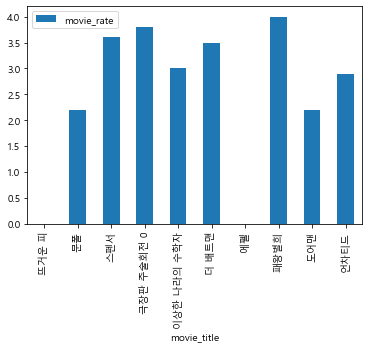

In [39]:
bodf.plot.bar(x='movie_title',y='movie_rate')

## 인스타그램은 어떻게 크롤링할까?
### 동적인것/로그인이 필요한것/계속 바뀌는 것/크롤링이 까다로움

### Selenium chrome driver 설치하기 [Chrome driver 다운로드](https://sites.google.com/chromium.org/driver/)
#### Windows : C:\Windows 에 넣기
#### Mac : /usr/local/bin 에 넣기

In [40]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import os
chrome_options = webdriver.ChromeOptions()
# 브라우저에 임의로 User-agent 옵션을 넣어 Python 코드로 접속함을 숨김
chrome_options.add_argument('--user-agent="Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.139 Safari/537.36"')
driver = webdriver.Chrome(chrome_options=chrome_options)
URL = "https://www.instagram.com/"

<ipython-input-40-eb05b8cc7200>:7: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_options=chrome_options)


In [41]:
driver.get(URL)

In [42]:
import login_info

In [43]:
ID = login_info.ID
PW = login_info.PW
driver.find_element(By.NAME, "username").send_keys(ID)
driver.find_element(By.NAME, "password").send_keys(PW)

In [44]:
driver.find_element(By.CLASS_NAME, "L3NKy").click()

In [45]:
driver.find_element(By.CLASS_NAME, "L3NKy").click()

In [46]:
driver.find_element(By.CLASS_NAME, "aOOlW").click()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":".aOOlW"}
  (Session info: chrome=99.0.4844.74)
Stacktrace:
Backtrace:
	Ordinal0 [0x00C19943+2595139]
	Ordinal0 [0x00BAC9F1+2148849]
	Ordinal0 [0x00AA4528+1066280]
	Ordinal0 [0x00AD0FD4+1249236]
	Ordinal0 [0x00AD11CB+1249739]
	Ordinal0 [0x00AFD812+1431570]
	Ordinal0 [0x00AEBA34+1358388]
	Ordinal0 [0x00AFBAF2+1424114]
	Ordinal0 [0x00AEB806+1357830]
	Ordinal0 [0x00AC6086+1204358]
	Ordinal0 [0x00AC6F96+1208214]
	GetHandleVerifier [0x00DBB232+1658114]
	GetHandleVerifier [0x00E7312C+2411516]
	GetHandleVerifier [0x00CAF261+560433]
	GetHandleVerifier [0x00CAE366+556598]
	Ordinal0 [0x00BB286B+2173035]
	Ordinal0 [0x00BB75F8+2192888]
	Ordinal0 [0x00BB76E5+2193125]
	Ordinal0 [0x00BC11FC+2232828]
	BaseThreadInitThunk [0x75EBFA29+25]
	RtlGetAppContainerNamedObjectPath [0x77567A7E+286]
	RtlGetAppContainerNamedObjectPath [0x77567A4E+238]


In [47]:
driver.get('https://www.instagram.com/'+login_info.ID)

In [48]:
for idx, img in enumerate([i.get_attribute('src') for i in driver.find_elements(By.XPATH,'//div[@class="KL4Bh"]/img')]):
    img_data = requests.get(img).content
    os.makedirs("./profile_images", exist_ok=True) 
    with open('profile_images/'+str(idx)+'.jpg', 'wb') as handler:
        handler.write(img_data)


MissingSchema: Invalid URL 'None': No schema supplied. Perhaps you meant http://None?

In [49]:
driver.close()